# INFO 5613 – Class 02: Data and Ethics

[Brian C. Keegan, Ph.D.](http://brianckeegan.com/)  
[Assistant Professor, Department of Information Science](https://www.colorado.edu/cmci/people/information-science/brian-c-keegan)  
University of Colorado Boulder  

Copyright and distributed under an [MIT License](https://opensource.org/licenses/MIT)

## Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import networkx as nx

pd.options.display.max_columns = 100

## Basic operations in `networkx`

This is adapted from the following documentation and resources:
* [networkx tutorial](https://networkx.org/documentation/stable/tutorial.html)
* Georgiev, P. (2014). [NetworkX: 
Network Analysis with Python](https://www.cl.cam.ac.uk/teaching/1314/L109/tutorial.pdf)
* Kapoor, A. (2018). [Social Network Analysis in Python](https://www.datacamp.com/community/tutorials/social-network-analysis-python)
* Platt, E. (2019). [Network Science with Python and NetworkX Quick Start Guide](https://github.com/elplatt/Network-Science-with-Python-and-NetworkX-Quick-Start-Guide).
* Wikipedia. (2021). [Graph representations](https://en.wikipedia.org/wiki/Template:Graph_representations).

### Adding nodes and edges

The basic pattern of creating networks in `networkx` involves starting with an empty version of a specific graph type and adding nodes and edges. These are toy examples to show the basic functionality, but we'll use rarely after we introduce alternative functions for working with real world data.

In [2]:
# Start with an empty graph object called g
g = nx.Graph()

In [3]:
# Add a node
g.add_node('Brian')

In [4]:
# Inspect
g.nodes()

NodeView(('Brian',))

In [5]:
# Add an edge
g.add_edge('Brian','Katy')

In [6]:
# Inspect nodes
g.nodes()

NodeView(('Brian', 'Katy'))

In [7]:
# Inspect edges
g.edges()

EdgeView([('Brian', 'Katy')])

In [8]:
# Add a few edges
g.add_edges_from([
    ('Brian','Samantha'),
    ('Brian','Lindsay'),
    ('Brian','Laurie'),
    ('Samantha','Katy'),
    ('Samantha','Laurie'),
    ('Laurie','Katy'),
    ('Laurie','Hande'),
    ('Samantha','Janet'),
    ('Brian','Hande'),
    ('Brian','Max'),
    ('Brian','Jay'),
    ('Brian','Priscilla'),
    ('Brian','Lily'),
    ('Brian','Clark'),
    ('Brian','Josh')
])

In [9]:
# Inspect nodes
g.nodes()

NodeView(('Brian', 'Katy', 'Samantha', 'Lindsay', 'Laurie', 'Hande', 'Janet', 'Max', 'Jay', 'Priscilla', 'Lily', 'Clark', 'Josh'))

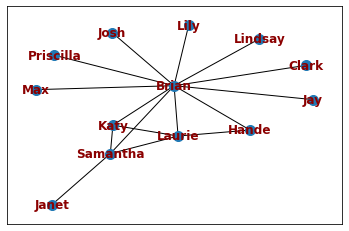

In [10]:
# Basic visualization
nx.draw_networkx(g,font_color='darkred',font_weight='bold',node_size=100)

#### Exercise

Add more edges to the class network based on other relationships you may know.

### Graph methods

Checking the number of nodes and edges.

In [11]:
# Count the number of nodes in the network
g.number_of_nodes()

13

In [12]:
# Count the number of edges in the network
g.number_of_edges()

16

### Checking for nodes and edges

Is a node in the network?

In [13]:
# Check the network for a node named "Diana"
g.has_node('Dianna')

False

Is an edge in the network?

In [14]:
# Check the network for an edge between "Matt" and "Nandi"
g.has_edge('Matt','Nandi')

False

### Neighbors

The graph object is similar to a dictionary (more on this in a bit). Use accessor notation with a node name to retrieve its neighbors.

In [15]:
# Who are Samantha's neighbors in the network?
g['Samantha']

AtlasView({'Brian': {}, 'Katy': {}, 'Laurie': {}, 'Janet': {}})

In [16]:
# You can also use the neighbors method
list(g.neighbors('Samantha'))

['Brian', 'Katy', 'Laurie', 'Janet']

In [19]:
list(g.neighbors('Laurie'))

['Brian', 'Samantha', 'Katy', 'Hande']

### Node and edge properties

We can add additional meta-data to the nodes and edges in the network.

In [22]:
# Add node attribute called "role" for Brian
g.nodes['Brian']['role'] = 'Faculty'

In [24]:
# Access a node's attribute
g.nodes['Brian']

{}

In [27]:
# Retrieve all nodes' attributes
g.nodes().data()

NodeDataView({'Brian': {'role': 'Faculty'}, 'Katy': {}, 'Samantha': {}, 'Lindsay': {}, 'Laurie': {}, 'Hande': {}, 'Janet': {}, 'Max': {}, 'Jay': {}, 'Priscilla': {}, 'Lily': {}, 'Clark': {}, 'Josh': {}})

In [28]:
g.nodes(data=True)

NodeDataView({'Brian': {'role': 'Faculty'}, 'Katy': {}, 'Samantha': {}, 'Lindsay': {}, 'Laurie': {}, 'Hande': {}, 'Janet': {}, 'Max': {}, 'Jay': {}, 'Priscilla': {}, 'Lily': {}, 'Clark': {}, 'Josh': {}})

We can similarly add meta-data to the edges.

In [29]:
# Add three relations
g['Brian']['Samantha']['relation'] = 'Advising'
g['Brian']['Katy']['relation'] = 'Advising'
g['Brian']['Laurie']['relation'] = 'Advising'

In [30]:
# Add another kind of meta-data
g['Brian']['Samantha']['years'] = 1
g['Brian']['Katy']['years'] = 1
g['Brian']['Laurie']['years'] = 0

We can add a bunch of meta data at once with a `[(node1,node2,dict)]` format where the `dict` contains the labels and values of the meta-data.

In [37]:
g.add_edges_from([
    ('Samantha','Katy',{'relation':'labmate','years':1}),
    ('Samantha','Laurie',{'relation':'labmate','years':0}),
    ('Laurie','Katy',{'relation':'labmate','years':0}),
    ('Laurie','Hande',{'relation':'cohort','years':0}),
    ('Samantha','Janet',{'relation':'friend','years':1}),
    ('Brian','Hande',{'relation':'teaching','years':3}),
    ('Brian','Max',{'relation':'teaching','years':2}),
    ('Brian','Jay',{'relation':'teaching','years':1}),
    ('Brian','Priscilla',{'relation':'teaching','years':1}),
    ('Brian','Lily',{'relation':'teaching','years':1}),
    ('Brian','Clark',{'relation':'teaching','years':1}),
    ('Brian','Josh',{'relation':'beeclub','years':2}),
    ('Brian','Lindsay',{'relation':'teaching','years':0}),
])

In [32]:
# Access edge data
g.edges().data()

EdgeDataView([('Brian', 'Katy', {'relation': 'Advising', 'years': 1}), ('Brian', 'Samantha', {'relation': 'Advising', 'years': 1}), ('Brian', 'Lindsay', {}), ('Brian', 'Laurie', {'relation': 'Advising', 'years': 0}), ('Brian', 'Hande', {'relation': 'teaching', 'years': 3}), ('Brian', 'Max', {'relation': 'teaching', 'years': 2}), ('Brian', 'Jay', {'relation': 'teaching', 'years': 1}), ('Brian', 'Priscilla', {'relation': 'teaching', 'years': 1}), ('Brian', 'Lily', {'relation': 'teaching', 'years': 1}), ('Brian', 'Clark', {'relation': 'teaching', 'years': 1}), ('Brian', 'Josh', {'relation': 'beeclub', 'years': 2}), ('Katy', 'Samantha', {'relation': 'labmate', 'years': 1}), ('Katy', 'Laurie', {'relation': 'labmate', 'years': 0}), ('Samantha', 'Laurie', {'relation': 'labmate', 'years': 0}), ('Samantha', 'Janet', {'relation': 'friend', 'years': 1}), ('Laurie', 'Hande', {'relation': 'cohort', 'years': 0})])

In [33]:
g.edges(data=True)

EdgeDataView([('Brian', 'Katy', {'relation': 'Advising', 'years': 1}), ('Brian', 'Samantha', {'relation': 'Advising', 'years': 1}), ('Brian', 'Lindsay', {}), ('Brian', 'Laurie', {'relation': 'Advising', 'years': 0}), ('Brian', 'Hande', {'relation': 'teaching', 'years': 3}), ('Brian', 'Max', {'relation': 'teaching', 'years': 2}), ('Brian', 'Jay', {'relation': 'teaching', 'years': 1}), ('Brian', 'Priscilla', {'relation': 'teaching', 'years': 1}), ('Brian', 'Lily', {'relation': 'teaching', 'years': 1}), ('Brian', 'Clark', {'relation': 'teaching', 'years': 1}), ('Brian', 'Josh', {'relation': 'beeclub', 'years': 2}), ('Katy', 'Samantha', {'relation': 'labmate', 'years': 1}), ('Katy', 'Laurie', {'relation': 'labmate', 'years': 0}), ('Samantha', 'Laurie', {'relation': 'labmate', 'years': 0}), ('Samantha', 'Janet', {'relation': 'friend', 'years': 1}), ('Laurie', 'Hande', {'relation': 'cohort', 'years': 0})])

In [36]:
g.edges(data=True)

EdgeDataView([('Brian', 'Katy', {'relation': 'Advising', 'years': 1}), ('Brian', 'Samantha', {'relation': 'Advising', 'years': 1}), ('Brian', 'Lindsay', {}), ('Brian', 'Laurie', {'relation': 'Advising', 'years': 0}), ('Brian', 'Hande', {'relation': 'teaching', 'years': 3}), ('Brian', 'Max', {'relation': 'teaching', 'years': 2}), ('Brian', 'Jay', {'relation': 'teaching', 'years': 1}), ('Brian', 'Priscilla', {'relation': 'teaching', 'years': 1}), ('Brian', 'Lily', {'relation': 'teaching', 'years': 1}), ('Brian', 'Clark', {'relation': 'teaching', 'years': 1}), ('Brian', 'Josh', {'relation': 'beeclub', 'years': 2}), ('Katy', 'Samantha', {'relation': 'labmate', 'years': 1}), ('Katy', 'Laurie', {'relation': 'labmate', 'years': 0}), ('Samantha', 'Laurie', {'relation': 'labmate', 'years': 0}), ('Samantha', 'Janet', {'relation': 'friend', 'years': 1}), ('Laurie', 'Hande', {'relation': 'cohort', 'years': 0})])

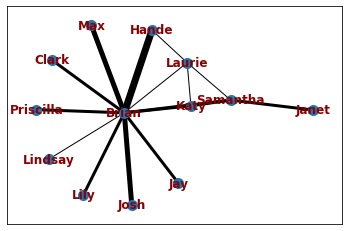

In [38]:
# Basic visualization
nx.draw_networkx(
    g,
    font_color='darkred',
    font_weight='bold',
    node_size=100,
    width=[2*d['years']+1 for i,j,d in g.edges(data=True)]
)

#### Exercise
Add some more metadata to the nodes and/or edges in the network.

## Network data structures

This is an example undirected network that (unusually) encodes a self-loop on node 1 (node 1 is connected to itself).
![Wikipedia graph](https://upload.wikimedia.org/wikipedia/commons/thumb/2/28/6n-graph2.svg/375px-6n-graph2.svg.png)

### Edge list

An *edge list* is the collection of the edges defined by their start and stop nodes.

`[(1,1),
  (1,2),
  (1,5),
  (2,3),
  (3,4),
  (4,5),
  (4,6)
 ]`

This data structure is space-efficient (only edges that exist are represented) which makes it one of the most popular ways of representing network data in various frameworks. But it is not very accssible for humans to apprehend or to enter data.

`networkx` represents a graph using this data structure by default. Here's our class network:

In [39]:
g.edges()

EdgeView([('Brian', 'Katy'), ('Brian', 'Samantha'), ('Brian', 'Lindsay'), ('Brian', 'Laurie'), ('Brian', 'Hande'), ('Brian', 'Max'), ('Brian', 'Jay'), ('Brian', 'Priscilla'), ('Brian', 'Lily'), ('Brian', 'Clark'), ('Brian', 'Josh'), ('Katy', 'Samantha'), ('Katy', 'Laurie'), ('Samantha', 'Laurie'), ('Samantha', 'Janet'), ('Laurie', 'Hande')])

### Adjacency matrix

An *adjacency matrix* is a square matrix of the nodes and the values of the matrix are whether a tie exists (binary) or valued (weighted). If the network is undirected, the matrix is symmetric around the diagonal. If the network is directed, the matrix is non-symmetric.


|     | 1 | 2 | 3 | 4 | 5 | 6 |
| --- | --- | --- | --- | --- | --- | --- |
| **1** | 1 | 1 | 0 | 0 | 1 | 0 | 
| **2** | 1 | 0 | 1 | 0 | 1 | 0 | 
| **3** | 0 | 1 | 0 | 1 | 0 | 0 | 
| **4** | 0 | 0 | 1 | 0 | 1 | 0 | 
| **5** | 1 | 1 | 0 | 1 | 0 | 0 | 
| **6** | 0 | 0 | 0 | 1 | 0 | 0 | 

This data structure is somewhat easier for humans to understand but it encodes a lot of unneeded data with the 0s.

`networkx` can display this data a few functions. Here's our class network:

In [40]:
# Representing with numpy
nx.adjacency_matrix(g).todense()

matrix([[0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
        [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [41]:
# Using pandas to get node labels
nx.to_pandas_adjacency(g)

,Brian,Katy,Samantha,Lindsay,Laurie,Hande,Janet,Max,Jay,Priscilla,Lily,Clark,Josh
Brian,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
Katy,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Samantha,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Lindsay,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Laurie,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hande,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Janet,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Max,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jay,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Priscilla,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Adjacency list

An *adjacency list* describes the neighbors of each node.

```
{1:[1,2,5],
 2:[1,3,5],
 3:[2,4],
 4:[3,5,6],
 5:[1,2,4],
 6:[4]
}
```

This data structure is commonly used in a variety of computer and data science settings and is even more information-dense than an edge list, but has performance trade-offs for many common network science metrics.

`networkx` can display this data with the `.adjacency()` method. Here's our class network:

In [42]:
list(g.adjacency())

[('Brian',
  {'Katy': {'relation': 'Advising', 'years': 1},
   'Samantha': {'relation': 'Advising', 'years': 1},
   'Lindsay': {'relation': 'teaching', 'years': 0},
   'Laurie': {'relation': 'Advising', 'years': 0},
   'Hande': {'relation': 'teaching', 'years': 3},
   'Max': {'relation': 'teaching', 'years': 2},
   'Jay': {'relation': 'teaching', 'years': 1},
   'Priscilla': {'relation': 'teaching', 'years': 1},
   'Lily': {'relation': 'teaching', 'years': 1},
   'Clark': {'relation': 'teaching', 'years': 1},
   'Josh': {'relation': 'beeclub', 'years': 2}}),
 ('Katy',
  {'Brian': {'relation': 'Advising', 'years': 1},
   'Samantha': {'relation': 'labmate', 'years': 1},
   'Laurie': {'relation': 'labmate', 'years': 0}}),
 ('Samantha',
  {'Brian': {'relation': 'Advising', 'years': 1},
   'Katy': {'relation': 'labmate', 'years': 1},
   'Laurie': {'relation': 'labmate', 'years': 0},
   'Janet': {'relation': 'friend', 'years': 1}}),
 ('Lindsay', {'Brian': {'relation': 'teaching', 'years': 0}

## File formats

There are many different file formats for representing and storing network data. Each file format makes different design decisions about data structures, meta-data, and support for more advanced types of graphs. This visualization summarizes some of the most popular file formats.

![Graph data format comparison](https://gephi.org/images/graph-format-table-comparison.png)
<center><b>Figure.</b> From <a href="https://gephi.org/users/supported-graph-formats/">Gephi.</a></center>

`networkx` supports file input/reading and output/writing with a variety of these formats. See the [documentation for the readwrite](https://networkx.org/documentation/stable/reference/readwrite/index.html) module for more details.

### Reading and writing edgelists

The edgelist representation of the data can be stored in a CSV-style table or as a JSON-style document.

#### Writing data
Use the `to_pandas_edgelist()` function to generate the CSV-style table.

In [ ]:
nx.to_pandas_edgelist(g)

Assign the pandas DataFrame to a variable and you can write it to disk using `pandas`'s `.to_csv()` method.

In [ ]:
g_pandas_edgelist_df = nx.to_pandas_edgelist(g)
g_pandas_edgelist_df.to_csv('class_edgelist_pandas.csv')

If you want to keep it in the JSON-style document, we can use the `json` library to dump the `g.edges()` data.

In [ ]:
g.edges(data=True)

Write to disk.

In [ ]:
g_json_edgelist = list(g.edges(data=True))

with open('class_edgelist_json.json','w') as f:
    json.dump(g_json_edgelist,f)

#### Loading data
Load the CSV-style edgelist back in and use the `from_pandas_edgelist()` function to turn it into a graph.

In [ ]:
read_pandas_edgelist_df = pd.read_csv('class_edgelist_pandas.csv',index_col=0)

# Inspect
read_pandas_edgelist_df.head()

In [ ]:
# Convert to a graph
read_pandas_edgelist_g = nx.from_pandas_edgelist(read_pandas_edgelist_df,edge_attr=True)

# Inspect the graph
read_pandas_edgelist_g.edges(data=True)

Load the JSON-style edgelist back in and use t

In [ ]:
with open('class_edgelist_json.json','r') as f:
    read_json_edgelist = json.load(f)
    
# Inspect
read_json_edgelist

In [ ]:
# Make an empty graph
read_json_edgelist_g = nx.Graph()

# Add all the edges from read_json_edgelist to the empty graph
read_json_edgelist_g.add_edges_from(read_json_edgelist)

# Inspect the graph
read_json_edgelist_g.edges(data=True)

### Reading and writing adjacency matrices

Use the `to_pandas_adjacency` function to generate the DataFrame and write it to a CSV.

In [ ]:
g_pandas_adjacency_df = nx.to_pandas_adjacency(g)

g_pandas_adjacency_df

In [ ]:
g_pandas_adjacency_df.to_csv('class_adjacency_pandas.csv')

Reading an adjacency matrix into Python and converting to a graph.

In [ ]:
read_pandas_edgelist_df = pd.read_csv('class_adjacency_pandas.csv',index_col=0)

read_pandas_edgelist_df.head()

In [ ]:
read_pandas_edgelist_g = nx.from_pandas_adjacency(read_pandas_edgelist_df)

read_pandas_edgelist_g.edges(data=True)

### Reading and writing GEXF

This is one of the most flexible and widely-supported file formats so I used it all the time.

In [ ]:
nx.write_gexf(g,'class_gexf.gexf')

In [ ]:
read_gexf = nx.read_gexf('class_gexf.gexf')

read_gexf.edges(data=True)

### Reading and writing GML

In [ ]:
nx.write_gml(g,'class_gml.gml')

In [ ]:
read_gml = nx.read_gml('class_gml.gml')

read_gml.edges(data=True)

## Exercises

Use an appropriate `networkx` function to read the *Game of Thrones* Season 1 data and assign it to the variable `got_g`.

Use an appropriate `networkx` function to display this graph as different data structures (edge list, adjacency matrix, adjacency list).

Use an appropriate `networkx` function to write this graph to a different file format than you used previously.

## Appendix

You don't need to run this code, I'm just providing it as an example of how the data we were using was made.

Season 1 of *Game of Thrones* character co-occurrence network.

In [ ]:
# Load libraries
import json, requests
from itertools import combinations

# Get the data
got_episodes_json = requests.get('https://raw.githubusercontent.com/jeffreylancaster/game-of-thrones/master/data/episodes.json').json()

# Inspect the data
got_episodes_json['episodes'][0]['scenes'][0]

In [ ]:
# Start with an empty undirected graph
g = nx.Graph()

# For each episode
for _e in got_episodes_json['episodes'][:9]:

    # Get the scenes
    _scenes = _e['scenes']
    
    # For each scene
    for _s in _scenes:
        
        # Make the character combinations
        _combos = list(combinations([c['name'] for c in _s['characters']],2))
        
        # For each character combination
        for (char1,char2) in _combos:
            
            # Check if the character combination is already in the network
            if g.has_edge(char1,char2):
                
                # If it is, increment the edge weight by 1
                g[char1][char2]['weight'] += 1
                
            else:
                # If it is not, add the nodes and the edge with a weight of 1
                g.add_edge(char1,char2,weight=1)
                
# Inspect
g.number_of_nodes(), g.number_of_edges()

In [ ]:
# Write as a edgelist
pd_edgelist = nx.to_pandas_edgelist(g)
pd_edgelist.to_csv('got_s1_edgelist.csv')

# Write as an adjacency matrix
pd_adjacency = nx.to_pandas_adjacency(g)
pd_adjacency.to_csv('got_s1_adjacency.csv')

# Write as GEXF
nx.write_gexf(g,'got_s1.gexf')

# Write as GML
nx.write_gml(g,'got_s1.gml')